In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
print('肿瘤的分类：',cancer['target_names'])
print('\n肿瘤的特征：\n',cancer['feature_names'])

肿瘤的分类： ['malignant' 'benign']

肿瘤的特征：
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [14]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('训练集数据形态：',X_train.shape)
print('测试集数据形态：',X_test.shape)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('训练集得分：{:.3f}'.format(gnb.score(X_train, y_train)))
print('测试集得分：{:.3f}'.format(gnb.score(X_test, y_test)))

print('模型预测的分类是：{}'.format(gnb.predict([X[312]])))
print('样本的正确分类是：',y[312])

gnb.predict_proba([X[312]])



训练集数据形态： (426, 30)
测试集数据形态： (143, 30)
训练集得分：0.941
测试集得分：0.944
模型预测的分类是：[1]
样本的正确分类是： 1


array([[3.18520801e-15, 1.00000000e+00]])

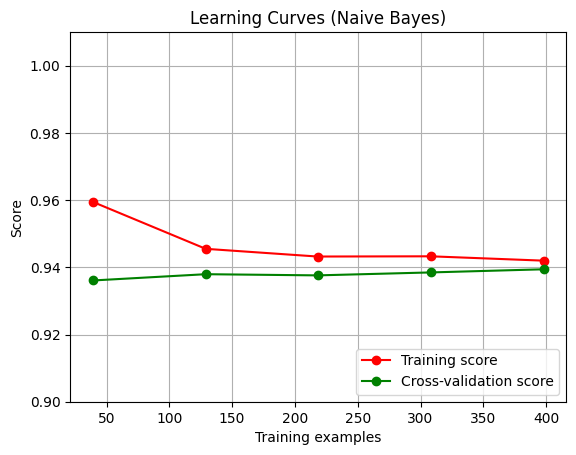

In [15]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt

title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=42)
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.9, 1.01), cv=cv, n_jobs=4)
plt.show()

In [21]:
pa = [12,23,67,12,321,
      0.076,0.051,0.018,
      0,0,0,
     0,0,0,0,
     0,0,0,
     0,0,0,
     0,0,0,
     0,0,0,
     0,0,0]
gnb.predict_proba([pa])



array([[0., 1.]])

In [ ]:
拟合良好
模型在验证集合上和训练集合上表现都很好，在测试集合上变现也很好